In [2]:
import numpy as np
from scipy.stats import norm, binom, poisson
from scipy import stats
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
np.set_printoptions(suppress=True)

### EX1

In [39]:
num_experiments = 10000
experiments = [[100, p] for p in [0.1, 0.3, 0.5, 0.7, 0.9]]
results = np.zeros((num_experiments, len(experiments)))

In [40]:
def get_mle(ns):
    p_hat = np.sum(ns) / (5*len(ns))
    return 1 - ((1-p_hat)**5 + 5*p_hat*(1-p_hat)**4 + 10*p_hat**2*(1-p_hat)**3)

In [41]:
for i in range(num_experiments):
    for j, (n, p) in enumerate(experiments):
        ns = np.random.binomial(5, p, n)
        mle = get_mle(ns)
        results[i][j] = mle

In [42]:
for j, (n, p) in enumerate(experiments):
    true_value = 1 - ((1-p)**5 + 5*p*(1-p)**4 + 10*p**2*(1-p)**3)
    var = results[:,j].var()
    mse = ((results[:,j] - true_value)**2).mean()
    bias = (results[:,j] - true_value).mean()
    #np.set_printoptions(suppress=True)
    np.set_printoptions(suppress=True, precision=4)
    print(f'p:{p}\nvar: {var}\nmse: {mse}\nbias: {bias}\n\n')

p:0.1
var: 1.15764943359652e-05
mse: 1.1698160494797428e-05
bias: 0.0003488067643154714


p:0.3
var: 0.0007505766956046172
mse: 0.0007529942941774864
bias: 0.0015548628791212799


p:0.5
var: 0.0017507890855560948
mse: 0.0017511789332428972
bias: -0.0006243778397752313


p:0.7
var: 0.0007389576808303923
mse: 0.0007395241724626207
bias: -0.0007526563839018646


p:0.9
var: 1.163197977569892e-05
mse: 1.1776434144775201e-05
bias: -0.00038007153152568696




### EX2

In [51]:
num_experiments = 10000
experiments = [[50, lam] for lam in [0.5, 1, 2, 5]]
results = np.zeros((num_experiments, len(experiments), 11))

In [52]:
def get_mle(ns, k):
    lam = ns.mean()
    return np.power(lam, k)*np.exp(-lam) / np.math.factorial(k)

In [53]:
for i in range(num_experiments):
    for j, (n, lam) in enumerate(experiments):
        for k in range(11):
            ns = np.random.poisson(lam=lam, size=n)
            mle = get_mle(ns, k)
            results[i][j][k] = mle

In [54]:
for j, (n, lam) in enumerate(experiments):
    for k in range(11):
        true_value = np.power(lam, k)*np.exp(-lam) / np.math.factorial(k)
        var = results[:,j,k].var()
        mse = ((results[:,j,k] - true_value)**2).mean()
        bias = (results[:,j,k] - true_value).mean()
        mean = results[:,j,k].mean()
        print(f'p:{lam} x:{k}\nvar: {var}\nmse: {mse}\nbias: {bias}\nmean: {mean}\ntrue_value: {true_value}\n\n')

p:0.5 x:0
var: 0.0036652965462140143
mse: 0.0036784579814589805
bias: 0.003627869243091026
mean: 0.6101585289557245
true_value: 0.6065306597126334


p:0.5 x:1
var: 0.0009455218587148357
mse: 0.0009702325994746669
bias: -0.004970989917494422
mean: 0.29829433993882226
true_value: 0.3032653298563167


p:0.5 x:2
var: 0.0004925141389480239
mse: 0.0004926267995250465
bias: 0.0003356494853602484
mean: 0.07615198194943944
true_value: 0.07581633246407918


p:0.5 x:3
var: 4.287108840762703e-05
mse: 4.339887744052911e-05
bias: 0.0007264909035232896
mean: 0.013362546314203154
true_value: 0.012636055410679864


p:0.5 x:4
var: 1.565670449772315e-06
mse: 1.6330978533609322e-06
bias: 0.00025966787169116076
mean: 0.0018391747980261435
true_value: 0.001579506926334983


p:0.5 x:5
var: 3.393709238344292e-08
mse: 3.628365765333433e-08
bias: 4.8441359083859516e-05
mean: 0.0002063920517173578
true_value: 0.0001579506926334983


p:0.5 x:6
var: 5.589623595439318e-10
mse: 6.06516542527978e-10
bias: 6.895954102

### EX3

In [55]:
num_experiments = 10000
experiments = [[50, t] for t in [0.5, 1, 2, 5]]
results = np.zeros((num_experiments, len(experiments), 3))

In [56]:
def get_mle(ns):
    n = len(ns)
    t = -n / np.sum(np.log(ns))
    return  t, 1/t**2

In [57]:
for i in range(num_experiments):
    for j, (n, beta) in enumerate(experiments):
        ns = np.random.beta(beta, 1, size=n)
        mle_t, mle_f = get_mle(ns)
        results[i][j][0] = mle_t
        results[i][j][1] = mle_f
        results[i][j][2] = np.sqrt(mle_f*n)*(mle_t-beta)

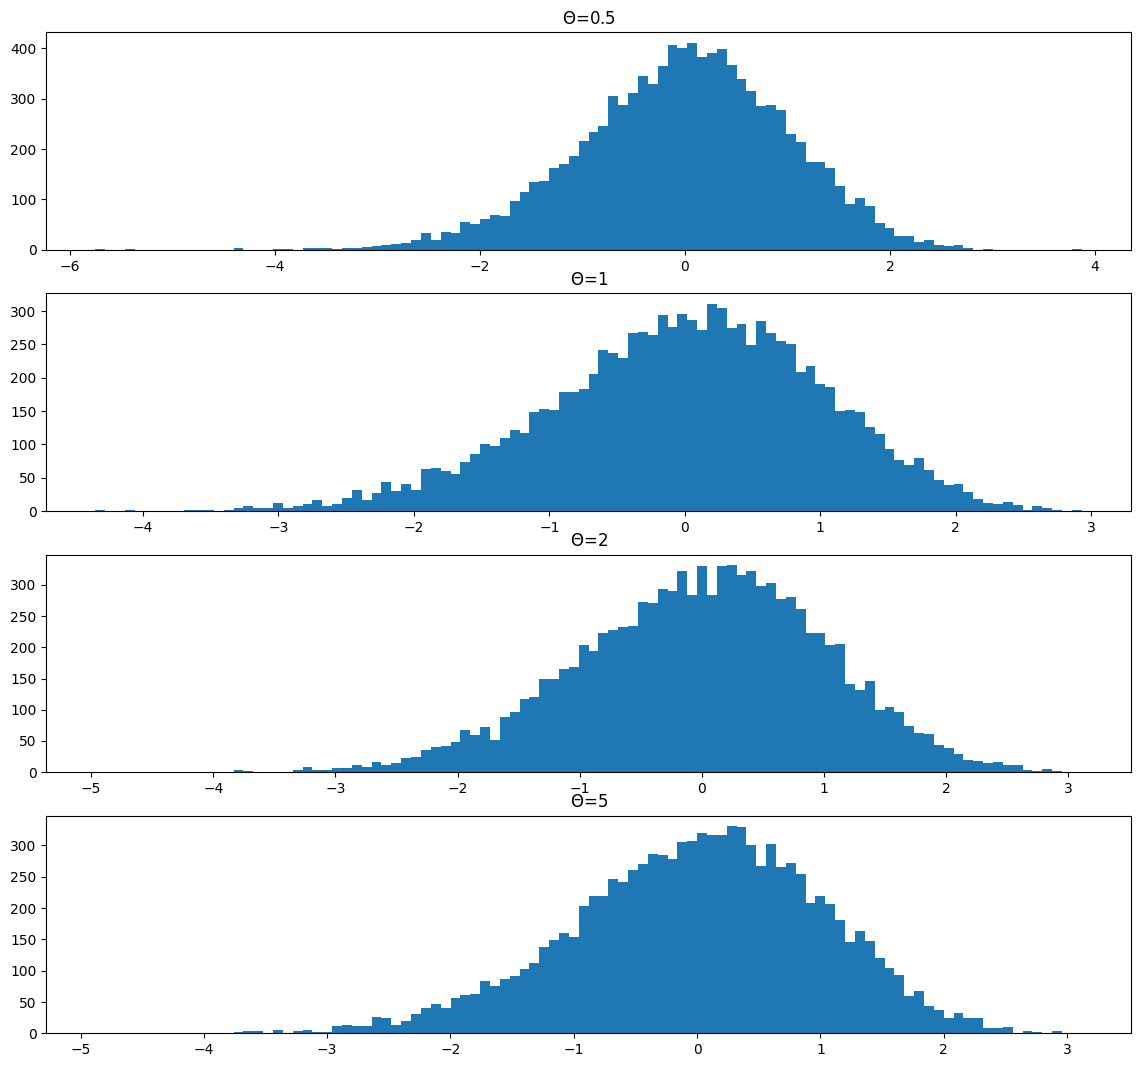

In [70]:
fig, axs = plt.subplots(4, figsize=(14, 13))
for j, (n, beta) in enumerate(experiments):
    axs[j].set_title(f'$\Theta$={beta}')
    axs[j].hist(results[:,j,2], bins=int(np.sqrt(len(results[:,j,2]))))

ShapiroResult(statistic=0.9944858551025391, pvalue=3.7263721453447285e-19)


/home/maurycy/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


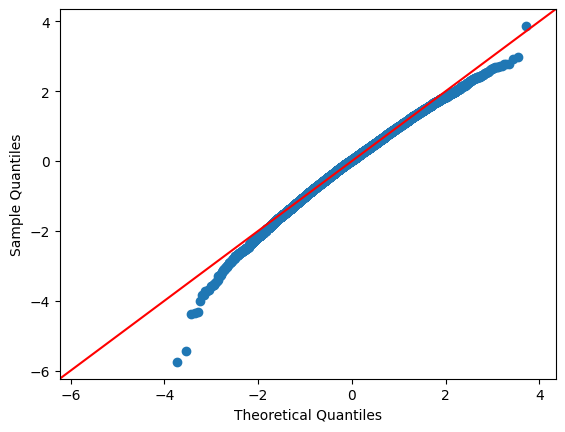

ShapiroResult(statistic=0.9944097995758057, pvalue=2.6789182470537166e-19)


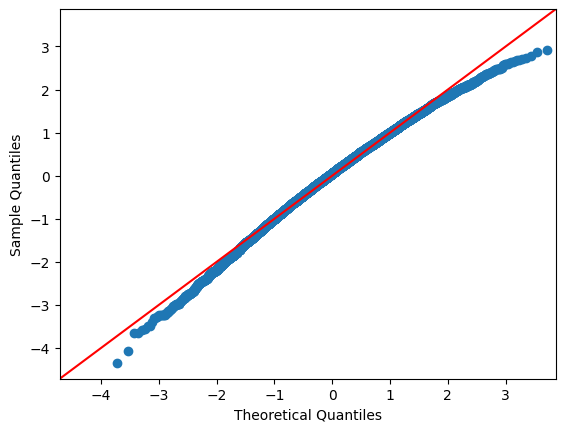

ShapiroResult(statistic=0.9960660338401794, pvalue=8.331394893369617e-16)


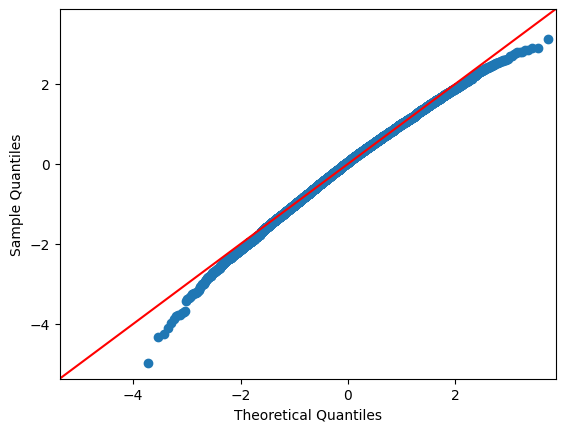

ShapiroResult(statistic=0.9940113425254822, pvalue=5.0019272367783466e-20)


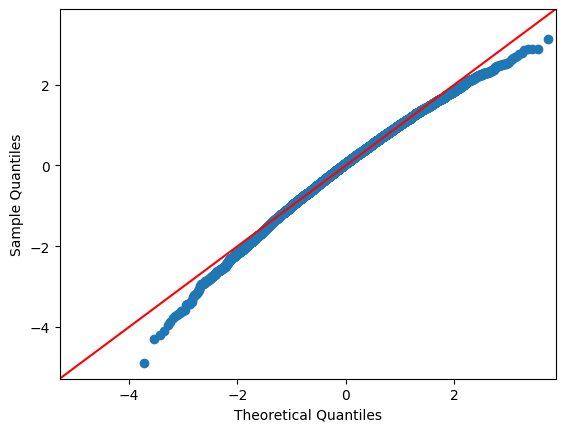

In [59]:
for j, (n, beta) in enumerate(experiments):
    print(stats.shapiro(results[:,j,2]))
    sm.qqplot(results[:,j,2], line ='45')
    py.show()

### EX4

In [71]:
NUM_SAMPLES = 50
NUM_EXP = 10000
summary = np.zeros((3,4,3))
estimators = ['t1', 't2', 't3', 't4']

In [72]:
def weights_4(i):
    return norm.pdf(norm.ppf((i-1)/NUM_SAMPLES)) - norm.pdf(norm.ppf(i/NUM_SAMPLES))
ws_4 = np.arange(1, NUM_SAMPLES + 1)
ws_4 = np.vectorize(weights_4)(ws_4)

def get_estimators(ns):
    t1 = np.sum(ns) / len(ns)
    
    t2 = np.median(ns)
    
    ws = np.random.randint(1, 100, NUM_SAMPLES)
    ws = ws / np.sum(ws)
    t3 = ns@ws
    
    ns_sorted = np.sort(ns)

    t4 = ns_sorted@ws_4
    
    return t1, t2, t3, t4

In [73]:
for i, (theta, sigma) in enumerate([(1,1), (4,1), (1,2)]):
    results = np.zeros((4, NUM_EXP))
    for j in tqdm(range(NUM_EXP)):
        ns = np.random.laplace(theta, sigma, NUM_SAMPLES)
        t1, t2, t3, t4 = get_estimators(ns)
        results[:, j] = np.array([t1, t2, t3, t4])
    
    print(f'mu: {theta} sigma: {sigma}')
    for j in range(4):
        var = results[j, :].var()
        mse = np.square(results[j, :] - theta).mean()
        bias = (results[j, :] - theta).mean()
        print(f't_{j}:\nvar:{var}\nmse:{mse}\nbias{bias}\n##########\n')
        summary[i , j, :] = np.array([var, mse, bias]) 
        

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 10396.98it/s]


mu: 1 sigma: 1
t_0:
var:0.04001098615550738
mse:0.0400126632635936
bias-0.001295032079221144
##########

t_1:
var:0.024201136278824354
mse:0.024202045605363372
bias-0.0009535861466172495
##########

t_2:
var:0.05322458716670123
mse:0.053226305639274586
bias-0.0013109052495674765
##########

t_3:
var:0.03996383212370833
mse:0.15561293724205552
bias0.34007220574217356
##########



100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 13997.45it/s]


mu: 4 sigma: 1
t_0:
var:0.04017281483869576
mse:0.04019477104280712
bias0.004685744776592338
##########

t_1:
var:0.024816396221241245
mse:0.024838034756404004
bias0.004651723891500646
##########

t_2:
var:0.05252885534903726
mse:0.052546591472668706
bias0.004211427742635674
##########

t_3:
var:0.03882186641444241
mse:7.13415784580381
bias-2.663707187246633
##########



100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 13700.42it/s]

mu: 1 sigma: 2
t_0:
var:0.16108824434041147
mse:0.16108825486761094
bias-0.00010260214157919645
##########

t_1:
var:0.09777107895037937
mse:0.09777200572236716
bias-0.0009626899749056838
##########

t_2:
var:0.21014112921042383
mse:0.2101466462179996
bias0.002348831108404825
##########

t_3:
var:0.1579334499328174
mse:2.9368642265842486
bias1.6670125304422374
##########



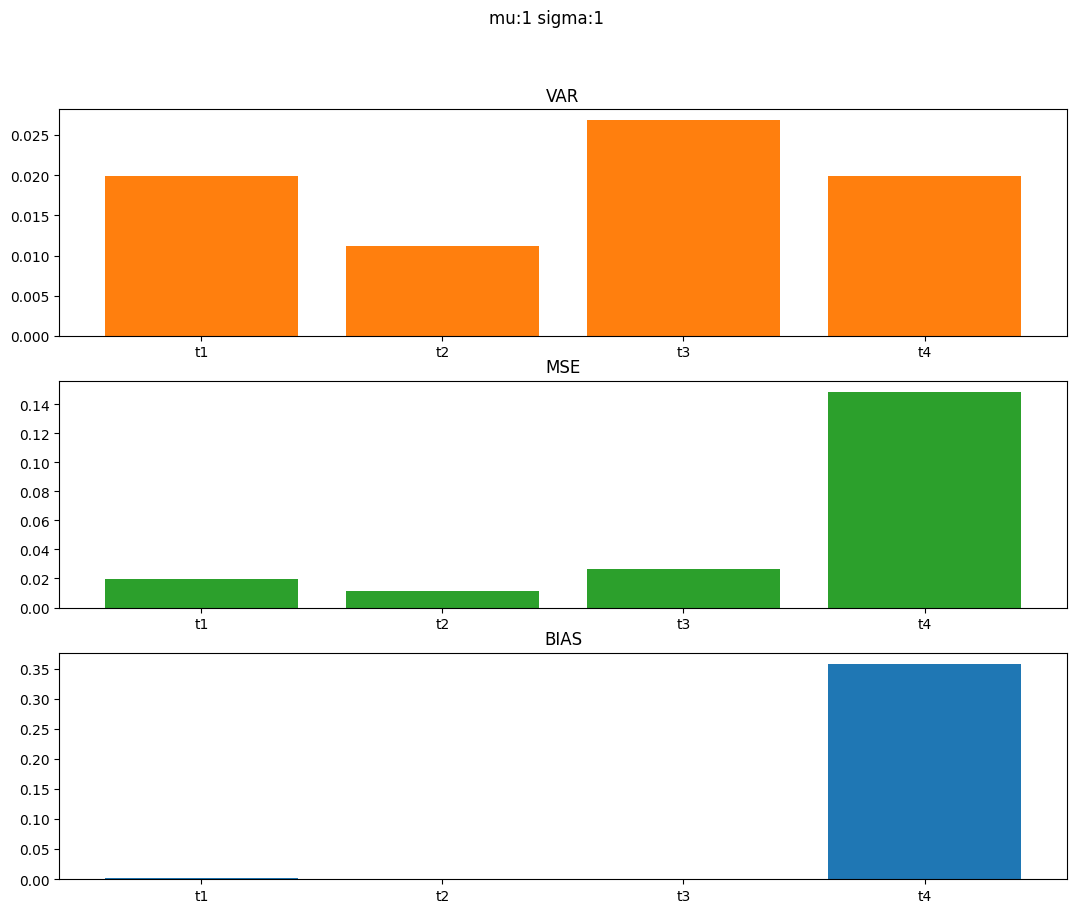

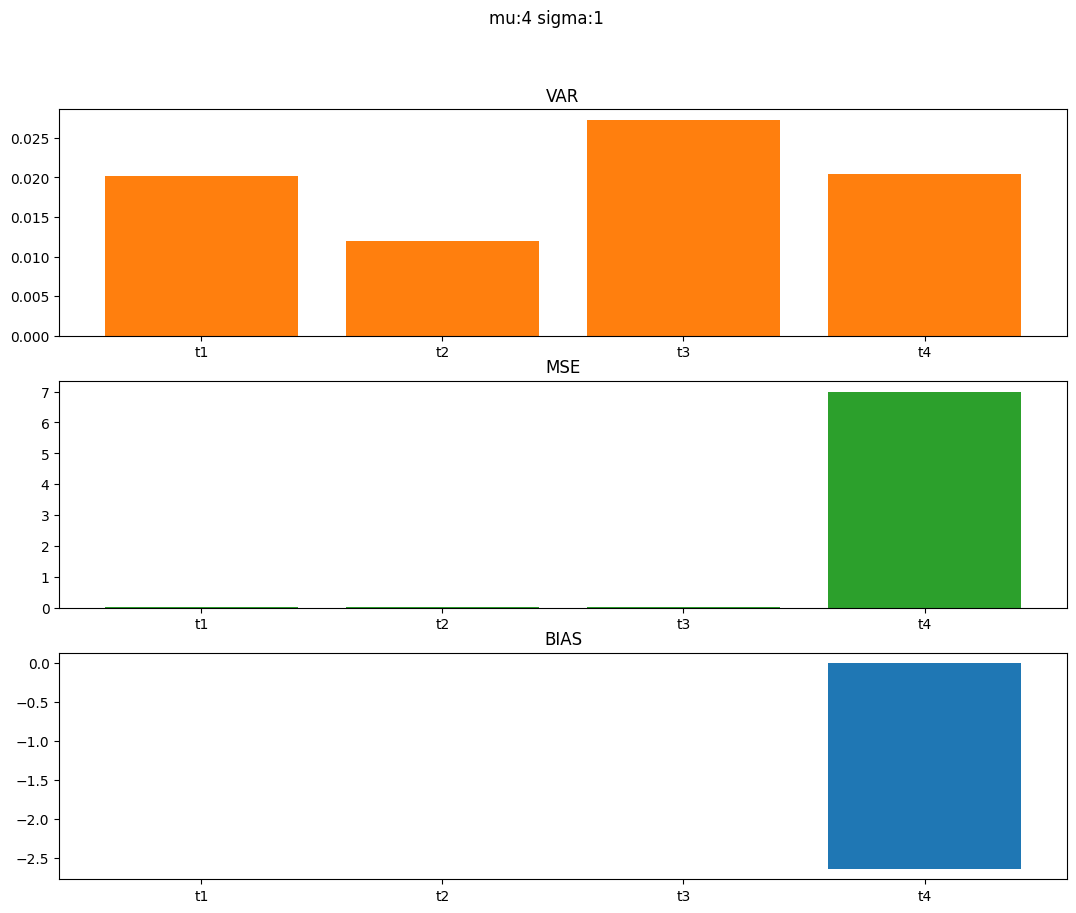

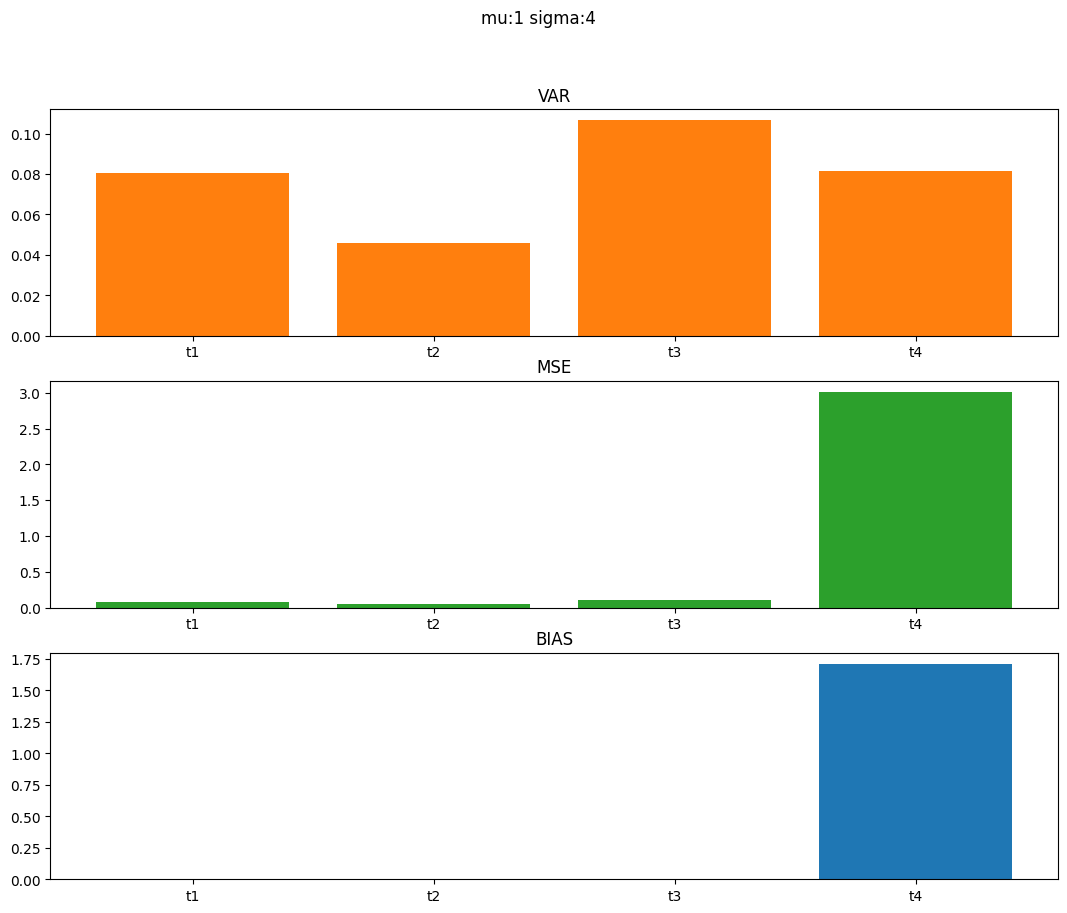

In [19]:
for i, (mu, sigma) in enumerate([(1,1), (4,1), (1,4)]):
    fig, axs = plt.subplots(3)
    fig.suptitle(f'mu:{mu} sigma:{sigma}')
    fig.set_figheight(10)
    fig.set_figwidth(13)
    axs[0].bar(estimators, summary[i,:,0], color='C1')
    axs[0].set_title('VAR')
    axs[1].bar(estimators, summary[i,:,1], color='C2')
    axs[1].set_title('MSE')
    axs[2].bar(estimators, summary[i,:,2])
    axs[2].set_title('BIAS')